# Welcome!

Team:

Author(s): Katie Miller, Nathan Tesfayi, Anna Valcarcel

Date(s): August 4-7, 2025




## 1. Setup

Import necessary packages.

In [1]:
import cartopy.crs as ccrs
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
import seaborn as sns
import cartopy.feature as cfeature
import matplotlib.dates as mdates

[back to top](#Contents)

In [2]:
auth = earthaccess.login(persist=True)

[back to top](#Contents)

In [3]:
# results = earthaccess.search_datasets(instrument="oci")

[back to top](#Contents)

In [4]:
# results = earthaccess.search_datasets(instrument="oci")

In [5]:
# # Define search criteria
# tspan = ("2024-08-24", "2025-10-29")
# var_code = "PACE_OCI_L3M_IOP"
# granule_name = "*.DAY.IOP*adg_442*4km*" # Change this for each variable and dataset (IOP, CHL, BGC, AOP,etc.)

# results = earthaccess.search_data(
#     short_name=var_code,
#     temporal=tspan,
#     granule_name=granule_name,
#     )

# paths = earthaccess.open(results)

In [6]:
# # Checke the number of files loaded from search
# len(paths)

From tutorial:

Because the L3M variables have lat and lon coordinates, it's possible to stack multiple granules along a new dimension that corresponds to time. Instead of `xr.open_dataset`, we can use` xr.open_mfdataset` to create a single `xarray.Dataset` (the "mf" in open_mfdataset stands for multiple files) from an array of paths.

The paths list is sorted temporally by default, which means the shape of the paths array specifies the way we need to tile the files together into larger arrays. We specify combine="nested" to combine the files according to the shape of the array of files (or file-like objects), even though paths is not a "nested" list in this case. The concat_dim="date" argument generates a new dimension in the combined dataset, because "date" is not an existing dimension in the individual files.

In [7]:
# dataset = xr.open_mfdataset(
#     paths,
#     combine="nested",
#     concat_dim="date",
# )
# # dataset

In [8]:
# # Define variable name
# var_name = "adg_442"

# # Drop unnecessary variables
# var_data = dataset.drop_vars(["palette"])
# var_data = var_data[var_name]

In [9]:
# # Define your bounding box
# lon_min = -85.469669
# lat_min = 24.254477
# lon_max = -80.897385
# lat_max = 29.159357


# # Take average over time and "slice" the global file to the region of interest
# var_avg = var_data.mean("date", keep_attrs=True)
# var_slice = var_avg.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# # Plot the variable
# fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# # Plot the data with correct transform and axis
# var_slice.plot(
#     ax=ax,
#     transform=ccrs.PlateCarree(),  # your data is in lat/lon
#     cmap="cmo.turbid",
#     vmin=0, # Change based on scale of your variable
#     vmax=0.1,
#     cbar_kwargs={'label': 'adg_442'}
# )

# # Set the map extent to your bounding box
# ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
# # ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'), alpha=0.85, zorder=5)

# # Add filled land
# ax.add_feature(cfeature.LAND, facecolor='white')

# # Add gridlines with labels
# ax.gridlines(draw_labels=True,alpha=0.2)

# plt.show()

# 4.5 Export 8-day Plots

In [51]:
def export_8day(ds_sliced,output_folder,v_min,v_max,cmap_name):

    # Plot the variable
    fig, ax = plt.subplots(figsize=(8, 7), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot the data with correct transform and axis
    var_slice.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),  # your data is in lat/lon
        cmap=cmap_name,
        vmin=v_min, # Change based on scale of your variable
        vmax=v_max
        # cbar_kwargs={'label': 'adg_442'}
    )
    
    # Set the map extent to your bounding box
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    # ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'), alpha=0.85, zorder=5)
    
    # Add filled land
    ax.add_feature(cfeature.LAND, facecolor='#D3D3D3')
    
    # Add gridlines with labels
    ax.gridlines(draw_labels=True,alpha=0.2)
    
    # plt.show()

    plt.savefig(output_folder)


In [11]:
# Export images for animation
# We want 8-day periods 30 days Before and After the event

# Define search criteria for Before the hurricane
tspan = ("2024-08-24", "2024-09-24")
var_code = "PACE_OCI_L3M_IOP"
granule_name = "*.8D.IOP*adg_442*4km*" # Change this for each variable and dataset (IOP, CHL, BGC, AOP,etc.)

results = earthaccess.search_data(
    short_name=var_code,
    temporal=tspan,
    granule_name=granule_name,
    )

paths_before = earthaccess.open(results)
# print(paths_before)

if len(paths_before) > 4:
    paths_before = paths_before[:-1]

print(paths_before)

QUEUEING TASKS | :   0%|          | 0/5 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/5 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/5 [00:00<?, ?it/s]

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240820_20240827.L3m.8D.IOP.V3_0.adg_442.4km.nc>, <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240828_20240904.L3m.8D.IOP.V3_0.adg_442.4km.nc>, <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240905_20240912.L3m.8D.IOP.V3_0.adg_442.4km.nc>, <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240913_20240920.L3m.8D.IOP.V3_0.adg_442.4km.nc>]


In [45]:
# Folder to write to
folder_path = "/home/jovyan/Hackweek/PACE_Hackweek_2025/Figures/Adg_442/Before/"

# Define variable name
var_name = "adg_442"

# Define your bounding box
lon_min = -85.469669
lat_min = 24.254477
lon_max = -80.897385
lat_max = 29.159357

# Define color map
cmap = "cmo.turbid"

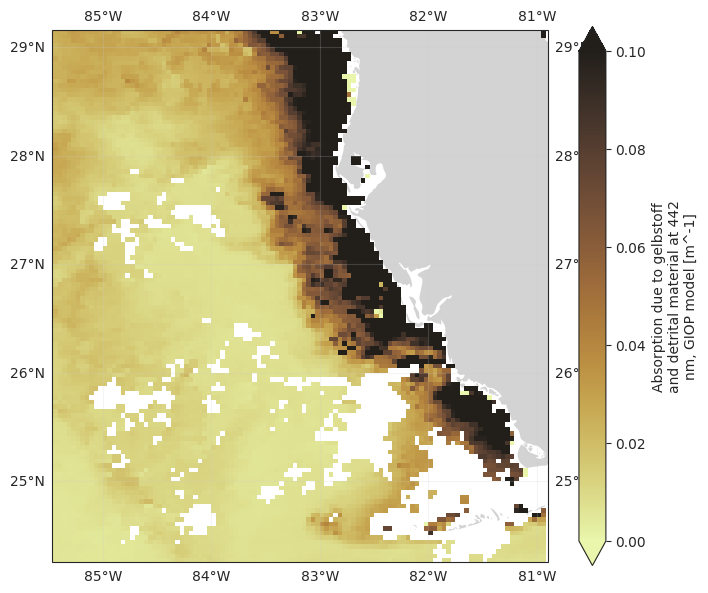

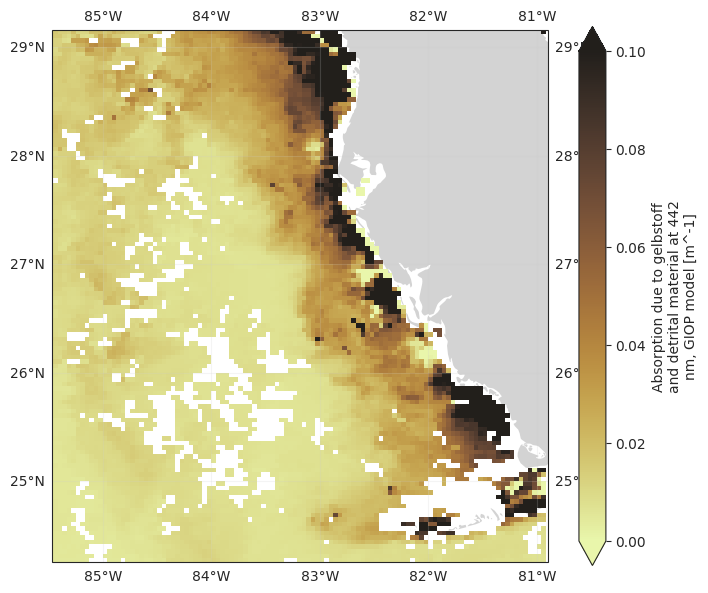

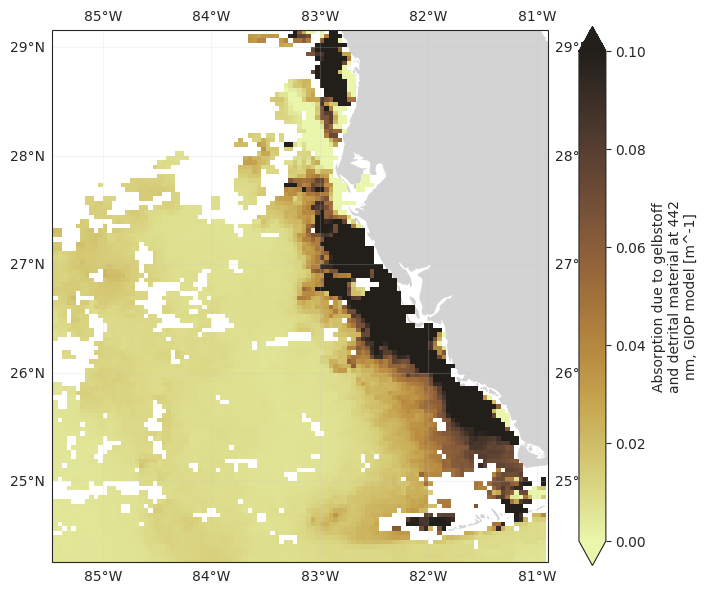

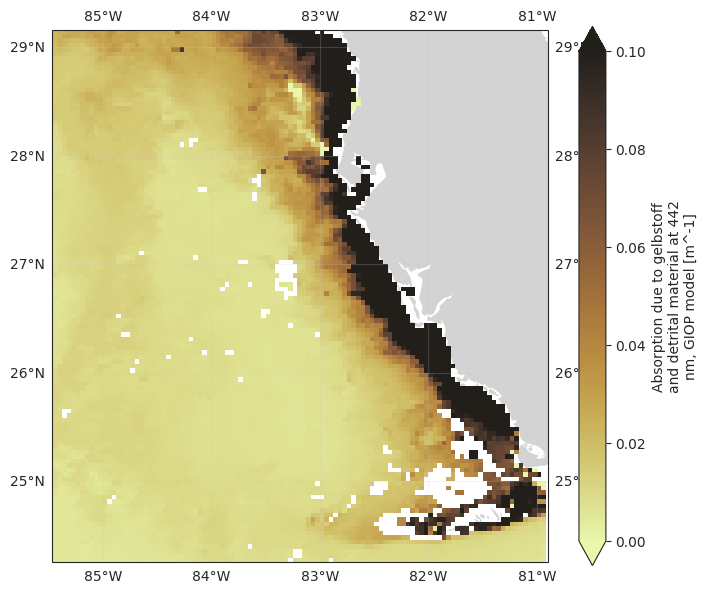

In [52]:
# Run the plotting function
for i in range(len(paths_before)):
    dataset = xr.open_dataset(paths_before[i])
    name = str(paths_before[i])
    
    filename = folder_path + var_name + "_8D_" + name[55:81] +"_BEFORE.png"
    
    # Drop unnecessary variables
    var_data = dataset.drop_vars(["palette"])
    var_data = var_data[var_name]

    var_slice = var_data.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))
    
    # call the plotting function, input list: (sliced_data, output_folder_name,cbar_vmin,cbar_vmax,cmap_name)
    export_8day(var_slice,filename,0,0.1,cmap)
    
    plt.show()

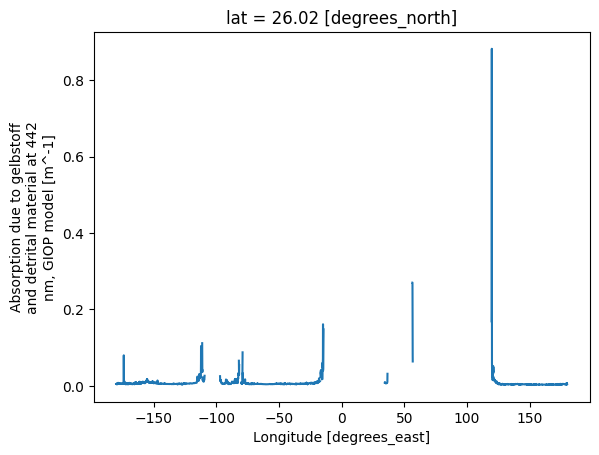

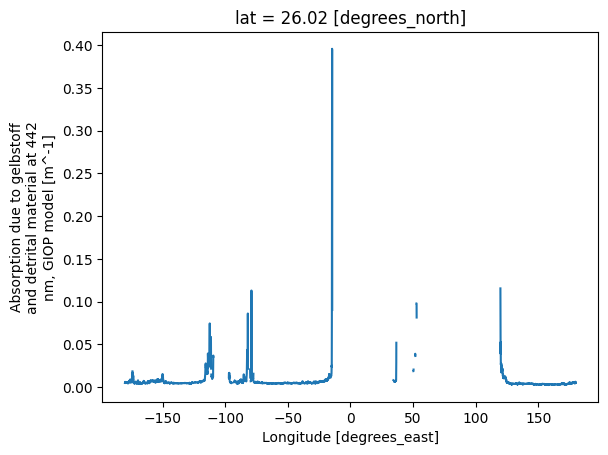

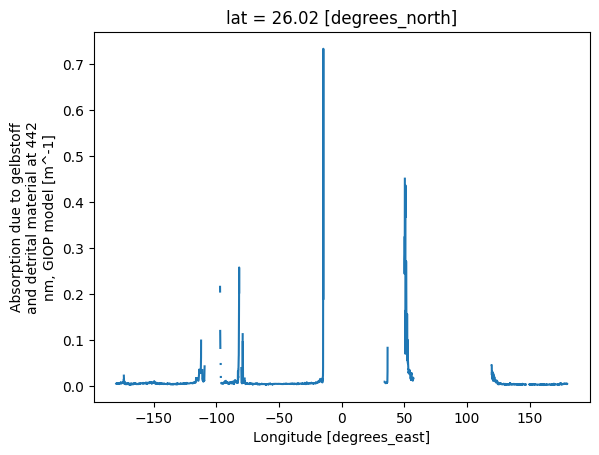

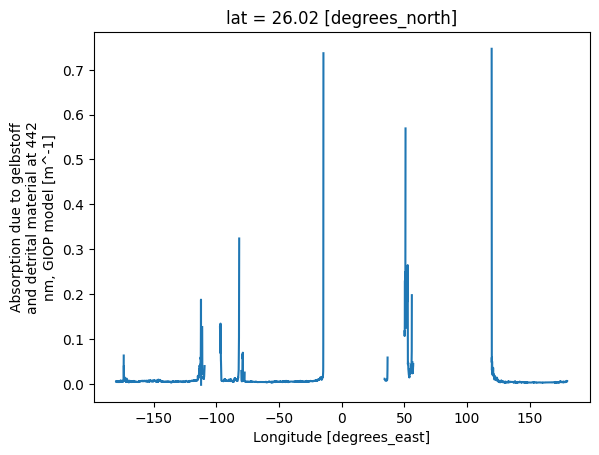

In [14]:
# Plot the transect for the weeks after
for i in range(len(paths_before)):
    dataset = xr.open_dataset(paths_before[i])
    
    # Drop unnecessary variables
    var_data = dataset.drop_vars(["palette"])

    lat_val = 26
    transect = var_data.sel(lat=lat_val, method="nearest")
    plot = transect[var_name].plot(x="lon")
    plt.show()

In [15]:
# Define search criteria for After the hurricane
tspan = ("2024-09-29", "2024-10-29")
var_code = "PACE_OCI_L3M_IOP"
granule_name = "*.8D.IOP*adg_442*4km*" # Change this for each variable and dataset (IOP, CHL, BGC, AOP,etc.)

results = earthaccess.search_data(
    short_name=var_code,
    temporal=tspan,
    granule_name=granule_name,
    )

paths_after = earthaccess.open(results)

if len(paths_after) > 4:
    paths_after = paths_after[1:]

print(paths_after)

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240929_20241006.L3m.8D.IOP.V3_0.adg_442.4km.nc>, <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20241007_20241014.L3m.8D.IOP.V3_0.adg_442.4km.nc>, <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20241015_20241022.L3m.8D.IOP.V3_0.adg_442.4km.nc>, <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20241023_20241030.L3m.8D.IOP.V3_0.adg_442.4km.nc>]


In [53]:
# Folder to write to
folder_path = "/home/jovyan/Hackweek/PACE_Hackweek_2025/Figures/Adg_442/After/"

# Define variable name
var_name = "adg_442"

# Define your bounding box
lon_min = -85.469669
lat_min = 24.254477
lon_max = -80.897385
lat_max = 29.159357

# Define color map
cmap = "cmo.turbid"

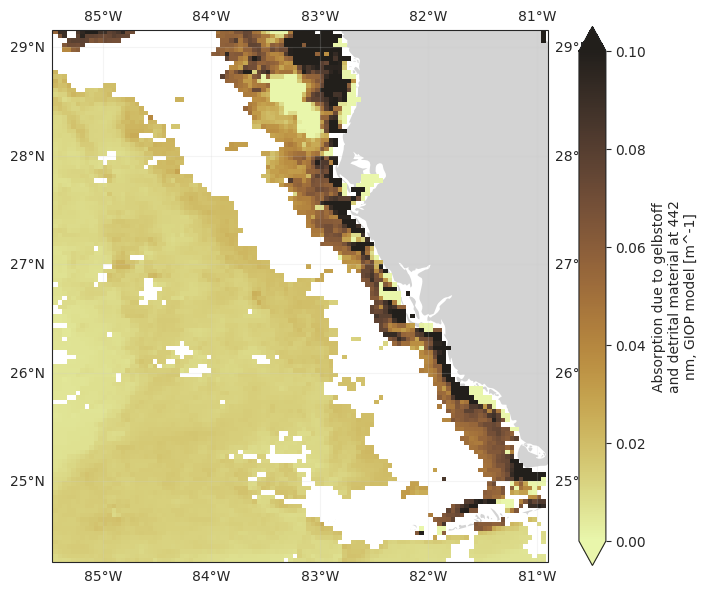

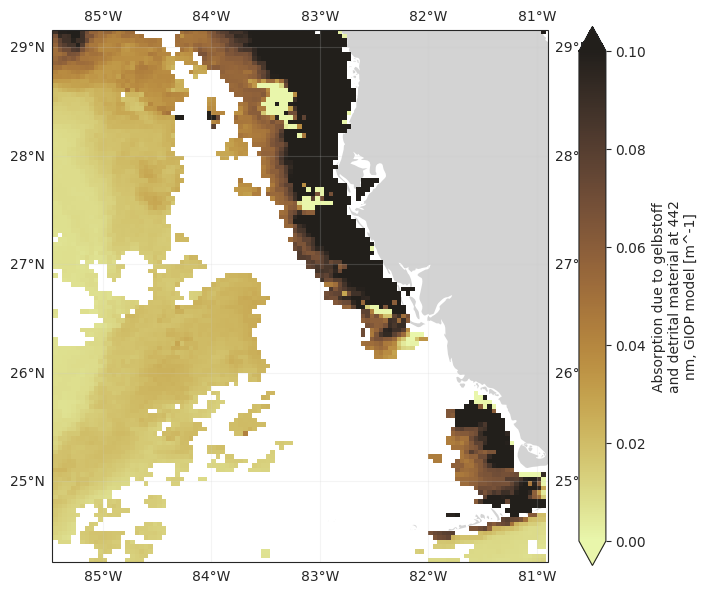

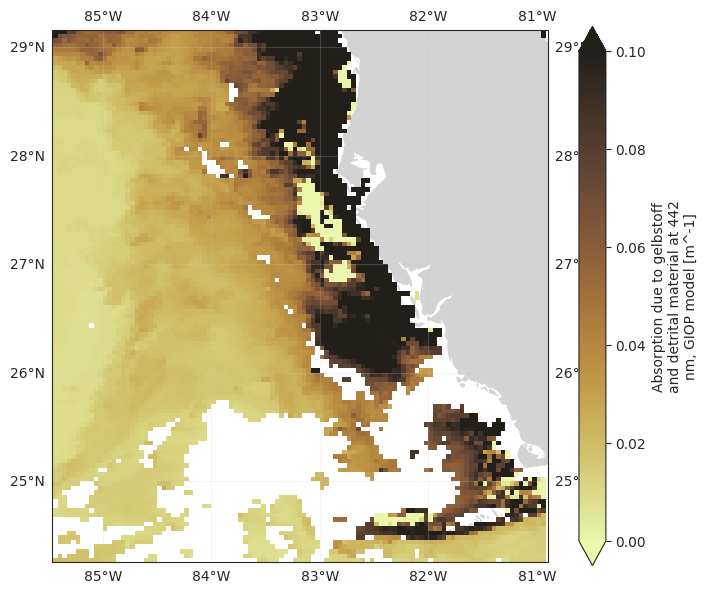

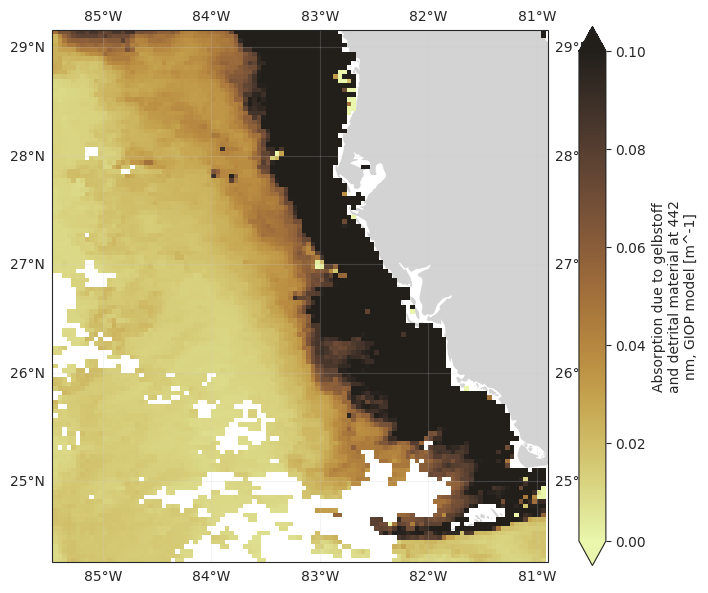

In [54]:
# Run the plotting function
for i in range(len(paths_after)):
    dataset = xr.open_dataset(paths_after[i])
    name = str(paths_before[i])
    
    filename = folder_path + var_name + "_8D_" + name[55:81] +"_AFTER.png"
    
    # Drop unnecessary variables
    var_data = dataset.drop_vars(["palette"])
    var_data = var_data[var_name]

    var_slice = var_data.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))
    
    # call the plotting function, input list: (sliced_data, output_folder_name,cbar_vmin,cbar_vmax,cmap_name)
    export_8day(var_slice,folder_path,0,0.1,cmap)
    
    # plt.show()

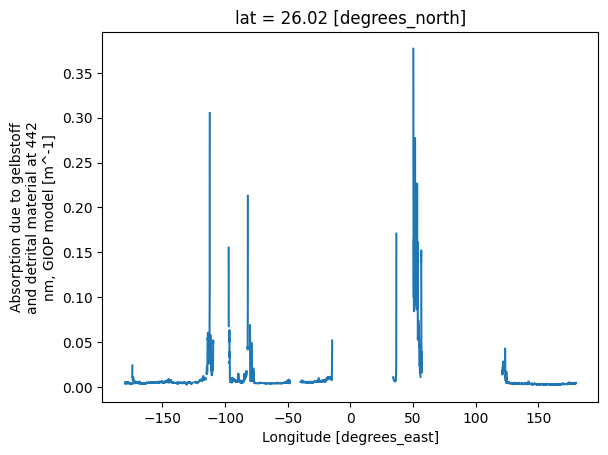

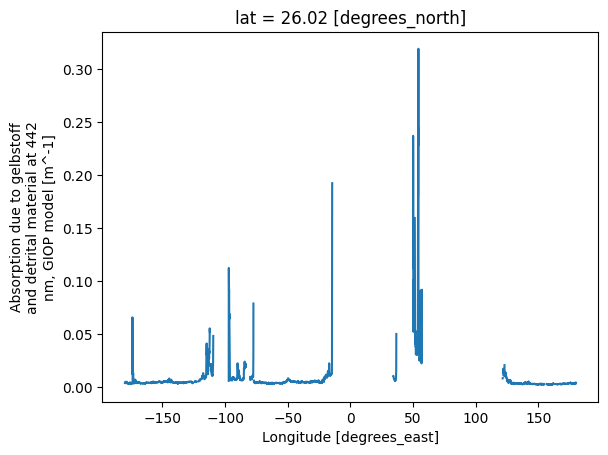

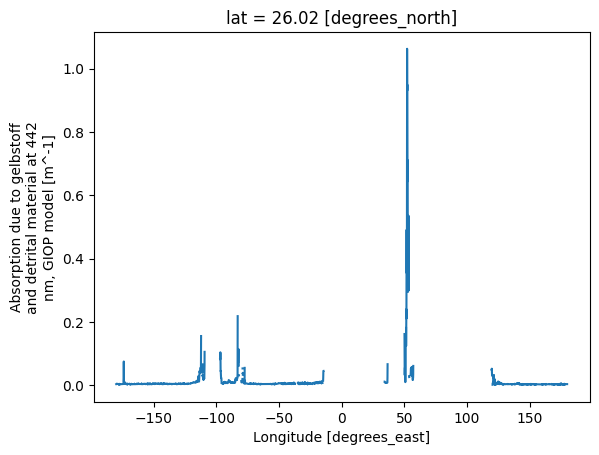

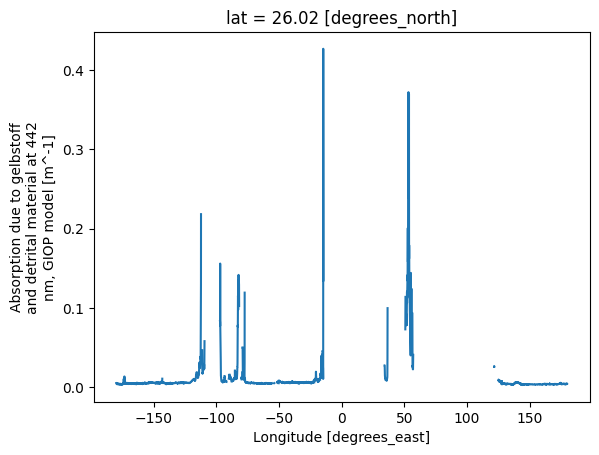

In [18]:
# Plot the transect for the weeks after
for i in range(len(paths_after)):
    dataset = xr.open_dataset(paths_after[i])
    
    # Drop unnecessary variables
    var_data = dataset.drop_vars(["palette"])

    lat_val = 26
    transect = var_data.sel(lat=lat_val, method="nearest")
    plot = transect[var_name].plot(x="lon")
    plt.show()

# 5. Plot Timeseries

## Daily Timeseries

In [19]:
# Take the mean and std dev over the region instead of all dates
region_mean = var_slice.mean(dim=["lat", "lon"])
region_std = var_slice.std(dim=["lat", "lon"])

In [20]:
region_mean.load()
region_std.load()

<xarray.DataArray 'adg_442' ()> Size: 4B
array(0.38631102, dtype=float32)

KeyError: 'adg_442'

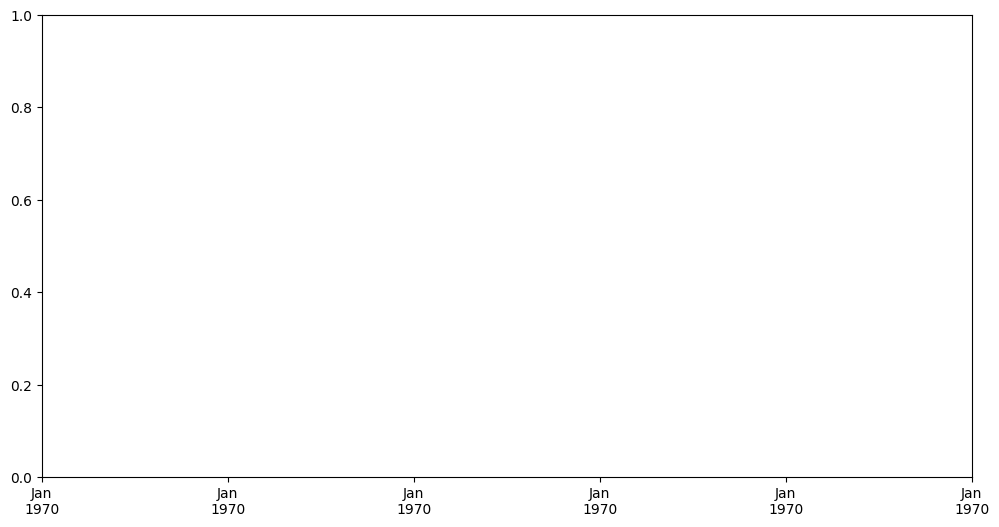

In [21]:
# Plot the timeseries of the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Style
linewidth = 1
markersize = 5
marker = "o"
sns.set_style("white")
palette = sns.color_palette("husl", 3)

# Format the date labels
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

# Left y-axis plots
ax1.plot(
    region_mean[var_name].coords["date"],
    region_mean[var_name],
    color=palette[0],
    marker=marker,
    label=var_name,
    linewidth=linewidth,
    markersize=markersize,
)
ax1.fill_between(
    region_mean[var_name].coords["date"],
    region_mean[var_name] - region_std[var_name],
    region_mean[var_name] + region_std[var_name],
    color=palette[0],
    alpha=0.2,
)

ax1.legend(loc="upper left",fontsize=14)

ax1.set_ylabel(var_name + " [m-1]",fontsize=14) # Change based on variable and units of measurement
plt.xticks(fontsize=14)
ax1.grid()
ax1.set_ylim([0, 0.1])

plt.title(var_name + " Timeline",fontsize=14)
plt.tight_layout()
plt.show()

## Monthly-Average Timeseries

In [ ]:
monthly_means = region_mean.groupby("date.month").mean()
monthly_stds = region_std.groupby("date.month").mean()

monthly_stds.load()
monthly_means.load()

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Style
linewidth = 1
markersize = 5
sns.set_style("white")
palette = sns.color_palette("husl", 3)

months = monthly_means["month"].values
month_names = [
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
    "Jan",
    "Feb",
    "Mar",
]  # Manually change if different range

# Left axis
ax1.plot(
    months,
    monthly_means[var_name].values,
    "o-",
    color=palette[0],
    label=var_name,
    linewidth=linewidth,
    markersize=markersize,
)
ax1.fill_between(
    months,
    monthly_means[var_name] - monthly_stds[var_name],
    monthly_means[var_name] + monthly_stds[var_name],
    color=palette[0],
    alpha=0.2,
)


# Add labels, titles and improve x-axis
# ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel(var_name + " [m-1]", fontsize=12)
ax1.set_xticks(range(1, 13))  # manually change if different months on x axis
ax1.set_xticklabels(month_names)

# ax1.legend(loc="upper left", frameon=True, framealpha=0.6)

plt.title(f"Monthly Averages for Region:", fontsize=14)
fig.text(
    0.5,
    0.01,
    "Shaded areas represent spatial standard deviation",
    ha="center",
    fontsize=10,
    style="italic",
)

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
plt.xticks(fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to make room for the note
plt.show()

[back to top](#Contents)